In [1]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt

from keras.layers import BatchNormalization

# Generate 2d dataset

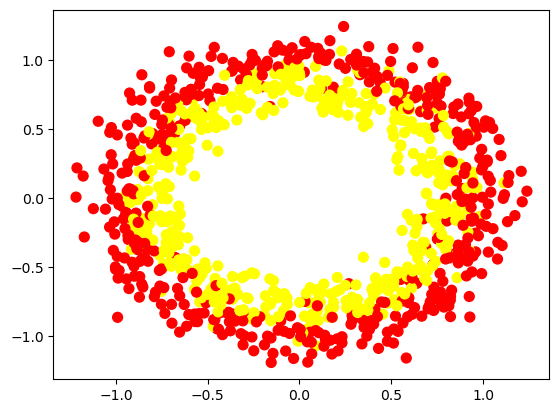

In [2]:
x,y=make_circles(n_samples=1000, noise=0.1,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

# Split the train & test

In [3]:
n_train=500
trainX,testX=x[:n_train,:],x[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

# Define the Model

In [4]:
model=Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

# Optimizer
optm=SGD(learning_rate=0.01, momentum=0.9)

# compiler

model.compile(loss='binary_crossentropy',optimizer=optm,metrics=['accuracy'])

In [5]:
'''
from keras.layers import Dense, Activation, BatchNormalization

model=Sequential([
    Dense(16,input_shape=(1,5),activation='relu'),
    Dense(32,activation='relu'),
    BatchNormalization(axis=1),
    Dense(2,activation='softmax')])


'''

"\nfrom keras.layers import Dense, Activation, BatchNormalization\n\nmodel=Sequential([\n    Dense(16,input_shape=(1,5),activation='relu'),\n    Dense(32,activation='relu'),\n    BatchNormalization(axis=1),\n    Dense(2,activation='softmax')])\n\n\n"

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 100 (400.00 Byte)
_________________________________________________________________


In [7]:
# Run the NN

history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=100,verbose=1)


Epoch 1/100
16/16 [==============================] - 1s 28ms/step - loss: 0.7747 - accuracy: 0.4860 - val_loss: 0.6920 - val_accuracy: 0.5140
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6282 - accuracy: 0.6440 - val_loss: 0.7282 - val_accuracy: 0.4960
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5523 - accuracy: 0.7720 - val_loss: 0.7920 - val_accuracy: 0.4960
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.7700 - val_loss: 0.8306 - val_accuracy: 0.4960
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.7960 - val_loss: 0.8193 - val_accuracy: 0.5020
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4844 - accuracy: 0.7780 - val_loss: 0.7898 - val_accuracy: 0.5160
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4714 - accuracy: 0.8000 - val_loss: 0.7482 - val_accuracy: 0.5400
Epoch 8/100


Epoch 59/100
16/16 [==============================] - 0s 12ms/step - loss: 0.4498 - accuracy: 0.7840 - val_loss: 0.3646 - val_accuracy: 0.8440
Epoch 60/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3987 - accuracy: 0.8380 - val_loss: 0.3851 - val_accuracy: 0.8320
Epoch 61/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4376 - accuracy: 0.7920 - val_loss: 0.3764 - val_accuracy: 0.8420
Epoch 62/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4514 - accuracy: 0.7660 - val_loss: 0.3729 - val_accuracy: 0.8420
Epoch 63/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4243 - accuracy: 0.8120 - val_loss: 0.3721 - val_accuracy: 0.8480
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4361 - accuracy: 0.8080 - val_loss: 0.3799 - val_accuracy: 0.8300
Epoch 65/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4349 - accuracy: 0.8080 - val_loss: 0.3673 - val_accuracy: 0.8380
Epoch

# Evaluate the model

In [8]:
_,train_acc=model.evaluate(trainX,trainy,verbose=1)
_,test_acc=model.evaluate(testX,testy,verbose=1)
print('Train Accuracy:\t', train_acc)
print()
print('Test Accuracy:\t',test_acc)

16/16 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8400
Train Accuracy:	 0.8199999928474426

Test Accuracy:	 0.8399999737739563


# Plot the results

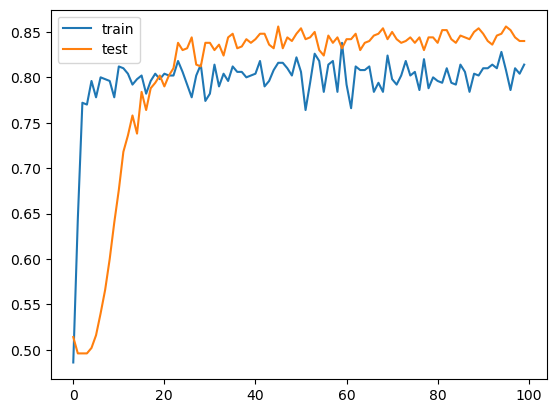

In [9]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

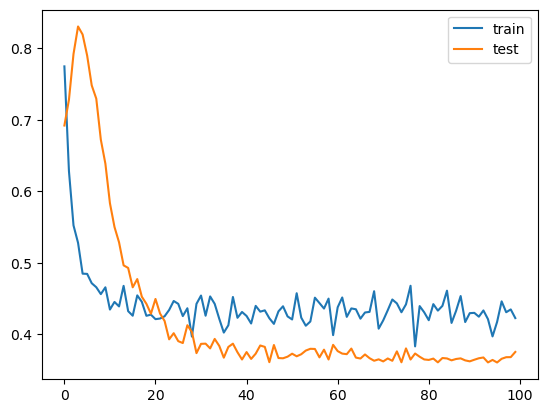

In [10]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()